# Learning and Decision Making

## Laboratory 5: Reinforcement learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The key world domain

Consider once again the gridworld domain from Lab 2 and which you modeled using a Markov decision process.

<img src="maze.png" width="200px">

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability. 

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$. 

* When the movement fails, the agent remains in the same cell. 

* To get a colored key, the agent simply needs to stand in the corresponding cell. 

* The goal of the agent is to reach the cell marked with **"G"**. 

Throughout the lab, use $\gamma=0.99$. As seen in Lab 2, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [1]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# States
X = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']

nX = len(X)

# Actions
A = ['U', 'D', 'L', 'R']

nA = len(A)

# Transition probabilities for the hare
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Cost function
             
c = np.array([[1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [0.0, 0.0, 0.0, 0.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0]])

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [2]:
def Q_value_iteration():
    MIN_ERR = 1e-8
    J = np.zeros((nX, 1))
    err = 1

    # Based on slide 62 of lec8.pdf:
    while err > MIN_ERR:
        Qs = [c[:, [i]] + gamma * P[i] @ J for i in range(nA)]
        Jnew = np.min(Qs, axis=0)
        err = np.linalg.norm(Jnew - J)
        J = Jnew
    return np.hstack(Qs)

Q1 = Q_value_iteration()
print(Q1)

[[ 5.84607096  5.84607096  5.84607096  4.89502117]
 [11.57144785 10.67823015 11.57144785 12.45352816]
 [ 7.0200601   7.9475408   6.08086879  7.9475408 ]
 [ 4.65725873  3.69420073  5.60830851  3.69420073]
 [12.67404824 11.79196792 11.79196792 12.67404824]
 [ 8.17941097  9.09532707  7.25193028  8.17941097]
 [ 3.45343623  2.47821842  4.41649423  3.45343623]
 [11.34814342  9.55043002 10.45492572 11.34814342]
 [ 7.25193028  9.09532707  8.17941097  9.09532707]
 [ 4.41649423  4.41649423  3.45343623  2.47821842]
 [12.45352816 11.57144785 10.67823015 11.57144785]
 [ 8.40839     9.3243061   8.40839     9.3243061 ]
 [ 3.20963178  2.23441397  3.20963178  1.24688279]
 [ 0.          0.          0.98753117  0.        ]
 [ 8.40839     9.3243061   9.3243061   9.3243061 ]
 [ 3.69420073  4.65725873  4.65725873  4.65725873]]


---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $x$, selects a random action using the $\epsilon$-greedy policy obtained from $Q$ for state $x$. Your function should receive an optional parameter, corresponding to $\epsilon$, with default value of 0.1. 

**Note:** In the case of two actions with the same value, your $\epsilon$-greedy policy should randomize between the two.

---

In [3]:
from collections import Counter

def epsilon_greedy(Q, x, epsilon=0.1):
    if np.random.choice([0, 1], p=[epsilon, 1-epsilon]):
        return np.random.choice(np.where(Q[x] == np.min(Q[x]))[0])
    else:
        return np.random.choice(nA)

def test_epsilon(X, epsilon):
    N_TESTS = 1000
    results = dict(Counter([epsilon_greedy(Q1, X, epsilon) for i in range(N_TESTS)]))
    for key in sorted(results):
        print("\t%d: %g%%" % (key, results[key] / N_TESTS * 100))

def test():
    X = 3
    print("Q for state %d:\n\t%s" % (X, str(Q1[X])))
    print("Always exploit:")
    test_epsilon(X, 0)
    print("50%/50%:")
    test_epsilon(X, 0.5)
    print("Always explore:")
    test_epsilon(X, 1)

test()

Q for state 3:
	[4.65725873 3.69420073 5.60830851 3.69420073]
Always exploit:
	1: 50.2%
	3: 49.8%
50%/50%:
	0: 12.5%
	1: 35.6%
	2: 11.6%
	3: 40.3%
Always explore:
	0: 22.9%
	1: 24.4%
	2: 25.1%
	3: 27.6%


### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the cost function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* The state and action, you will then compute the cost and generate the next state; 
* With this transition information (state, action, cost, next-state), you can now perform an update. 
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the boat reaches the goal cell, make one further step, the corresponding update, and then reset the position of the vehicle to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

[[ 5.82259432  5.85047924  5.80778931  4.87308328]
 [11.58822774 10.61455366 11.48350184 12.27397696]
 [ 7.01606961  7.98047487  6.08181127  8.0113582 ]
 [ 4.63556503  3.68799162  5.57702983  3.70576274]
 [12.45220575 11.56933765 11.69957186 12.62161522]
 [ 8.75491721  8.4124576   7.29679203  8.03191369]
 [ 3.57600385  2.53970934  4.60495516  3.46658891]
 [11.32913263  9.4857583  10.38506108 11.16850138]
 [ 7.23464481  9.01059916  8.15736376  8.94428101]
 [ 4.41995049  4.57427645  3.44464501  2.48552619]
 [12.49415141 11.40384427 10.52456376 11.39183469]
 [ 8.49813161  8.90304139  8.21679681  8.40999971]
 [ 3.1532677   2.27294484  3.36600004  1.28864566]
 [ 0.          0.          0.72839839  0.        ]
 [ 8.37996958  9.27318988  9.26117621  9.27325759]
 [ 3.76300727  4.420697    4.420697    5.05185617]]


<IPython.core.display.Javascript object>


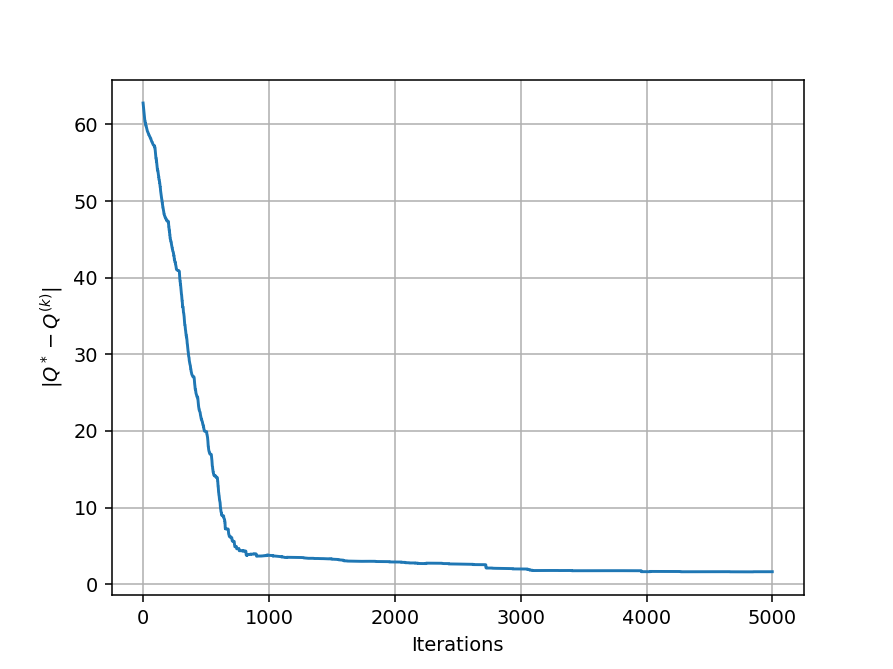

In [4]:
N_ITERATIONS = 5000
GOAL = 13

P3 = [np.eye(nX) for a in range(nA)]
c3 = np.zeros((nX, nA))
Q3 = np.zeros((nX, nA))
N3 = np.zeros((nX, nA))

def P_t1(y, x_t, a_t, x_t1, alpha):
    P3[a_t][x_t, y] = P3[a_t][x_t, y] + alpha * (int(x_t1 == y) - P3[a_t][x_t, y])
    
    # Doesn't seem to be necessary for np.random.choice
    # Also some lines get zeroed out? Would that mean a uniform distribution?
    #s = np.sum(P3[a_t][x_t])
    #if s != 0:
    #    P3[a_t][x_t] /= s
    
    return P3[a_t][x_t, y]

def c_t1(x_t, a_t, c_t, alpha):
    c3[x_t, a_t] = c3[x_t, a_t] + alpha * (c_t - c3[x_t, a_t])
    return c3[x_t, a_t]

def step_size(x_t, a_t):
    return 1/(N3[x_t, a_t] + 1)

# Slide 4 of lec21.pdf
def Q_t1(x_t, a_t, c_t, x_t1):
    alpha = step_size(x_t, a_t)
    N3[x_t, a_t] += 1
    result = c_t1(x_t, a_t, c_t, alpha)
    for y in range(nX):
        result += gamma * P_t1(y, x_t, a_t, x_t1, alpha) * np.min(Q3[y])
    return result

def reset():
    return np.random.choice((1, 4, 7, 10)) # The 4 states without a key

def plot_norm_Qstar_Q(norms):
    fig = plt.figure()
    plt.gca().grid(True)
    plt.plot(np.arange(len(norms)), norms)
    plt.xlabel("Iterations")
    plt.ylabel("$\|Q^*-Q^{(k)}\|$")
    plt.show()

def simulate(Q, Q_update_function, use_a_t1 = False):
    norms = []
    x_t = reset()
    a_t = epsilon_greedy(Q, x_t)
    
    for i in range(N_ITERATIONS):
        c_t = c[x_t, a_t]
        x_t1 = np.random.choice(nX, p=P[a_t][x_t])
        a_t1 = epsilon_greedy(Q, x_t1)
        
        if use_a_t1:
            Q[x_t, a_t] = Q_update_function(x_t, a_t, c_t, x_t1, a_t1)
        else:
            Q[x_t, a_t] = Q_update_function(x_t, a_t, c_t, x_t1)
        
        # If x_t1 is the GOAL, the extra iteration will still run as specified, as x_t isn't the GOAL
        if x_t == GOAL:
            x_t = reset()
            a_t = epsilon_greedy(Q, x_t)
        else:
            x_t = x_t1
            a_t = a_t1
        
        norms.append(np.linalg.norm(Q1 - Q))
    return norms

norms3 = simulate(Q3, Q_t1)
print(Q3)
plot_norm_Qstar_Q(norms3)

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with that of the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

[[ 5.50978873  5.64625148  5.43881745  4.50954744]
 [10.89660421  9.89556134 10.99736078 11.29287635]
 [ 6.66203475  7.57986244  5.68844896  7.84849874]
 [ 4.43221116  4.2856841   5.39712208  3.17608606]
 [11.65548534 11.05826985 11.52811267 11.54832991]
 [ 7.69675878  7.35539906  6.82752502  7.46786098]
 [ 3.35324851  2.05815457  4.15015798  3.25624915]
 [10.31111667  8.86090015 10.06096576 10.58732716]
 [ 6.81613259  8.08990108  7.62914253  8.47549373]
 [ 3.60562307  3.74137188  3.44331508  2.37236657]
 [11.67778468 10.97627197  9.84861426 11.07695473]
 [ 7.82795519  8.08502142  8.11064801  7.90036045]
 [ 3.10999451  2.05594651  3.08196743  1.01053719]
 [ 0.          0.          0.79206483  0.        ]
 [ 7.90266358  8.95363063  8.64667369  8.79310938]
 [ 3.528811    3.50400494  3.70698372  3.60068946]]


<IPython.core.display.Javascript object>


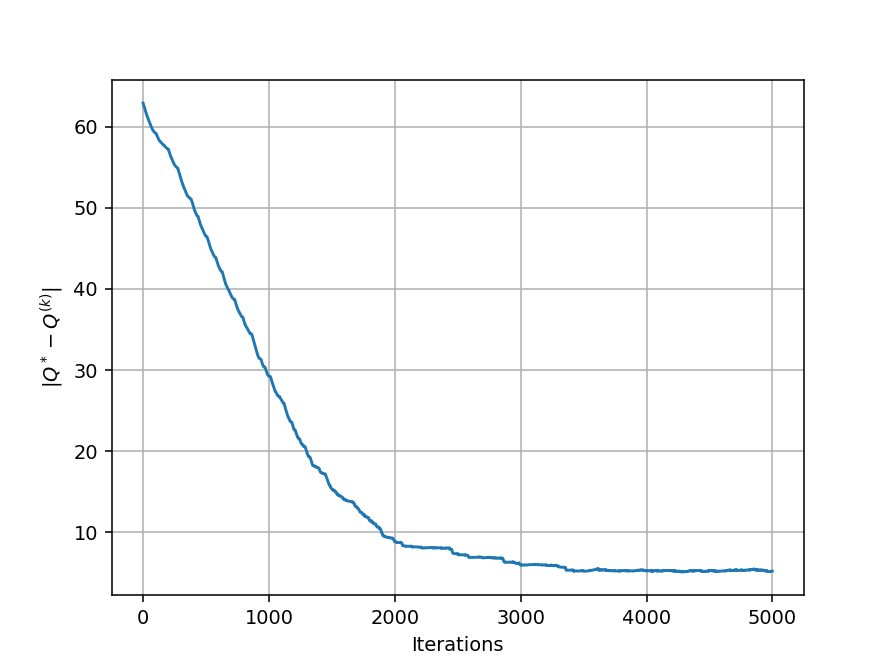

In [5]:
Q4 = np.zeros((nX, nA))

# Slide 15 of lec21.pdf
def Q_learning_update(x_t, a_t, c_t, x_t1, alpha = 0.3):
    return Q4[x_t, a_t] + alpha * (c_t + gamma * np.min(Q4[x_t1]) - Q4[x_t, a_t])

norms4 = simulate(Q4, Q_learning_update)
print(Q4)
plot_norm_Qstar_Q(norms4)

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

[[ 6.49815185  6.56456687  6.25874729  5.41264327]
 [12.20080846 11.37236067 11.93480614 12.59589709]
 [ 8.25638284  8.07803163  6.72590454  8.40691761]
 [ 4.72783871  3.66537699  6.22805386  5.05437197]
 [12.50166056 12.18957802 12.1324107  12.56869542]
 [ 8.19398947  8.40346072  7.68259872  8.38544972]
 [ 3.81375609  3.18888573  4.19019633  4.35691409]
 [11.48066104 11.06974387 11.22574713 11.65077658]
 [ 8.28054646  9.93213879  9.43837989  9.06777115]
 [ 4.35941115  3.55243048  3.51085377  2.62184423]
 [12.16049417 11.71348014 11.22400544 11.5135535 ]
 [ 8.63872832  8.6486298   9.05108922  8.82010052]
 [ 3.31638718  2.52666102  3.17204867  1.74181595]
 [ 0.48761541  0.51647175  1.45863215  0.53778625]
 [ 9.02597207 10.67372787 10.93691556 10.77873737]
 [ 3.70995127  3.63494783  3.76818567  3.50693705]]


<IPython.core.display.Javascript object>


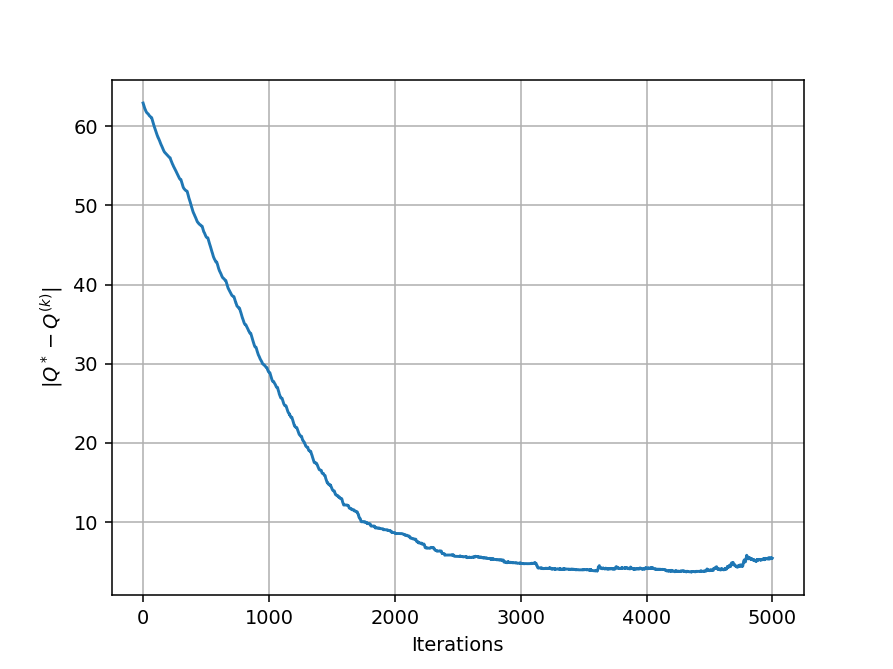

In [6]:
Q5 = np.zeros((nX, nA))

# Slide 32 of lec21.pdf
def SARSA_update(x_t, a_t, c_t, x_t1, a_t1, alpha = 0.3):
    return Q5[x_t, a_t] + alpha * (c_t + gamma * Q5[x_t1, a_t1] - Q5[x_t, a_t])

norms5 = simulate(Q5, SARSA_update, use_a_t1 = True)
print(Q5)
plot_norm_Qstar_Q(norms5)

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

As can be seen from Figure 1, the performance of the model-based learning was the best, usually reaching a smaller $\|Q^*-Q^{(k)}\|$ than the other methods. The second best method was typically SARSA (Figure 3), reaching the second smallest $\|Q^*-Q^{(k)}\|$. Q-learning (Figure 2) had the highest $\|Q^*-Q^{(k)}\|$, but was quite similar to SARSA.

Depending on the explored actions (due to the randomness of the $\epsilon$-greedy policy), Q-learning and SARSA may stabilize between 2000 to 3000 iterations. Model-based learning usually semi-stabilizes at around 800 to 900 iterations, only occasionally decreasing after it.

Between SARSA and Q-Learning (temporal-difference learning; model-free), this result is expected as SARSA is on-policy while Q-learning is off-policy $-$ the latter doesn't follow the optimal policy it's trying to learn and thus commits more mistakes and takes more time to learn.

The model-based method performed better than the other two (model-free methods) because it learned approximate transition probabilities and cost function for the given problem, and as such is able to predict future states. However, the model requires more memory than model-free methods, which may not be feasible for larger problems.